## This file:
 1) Loads a pickled batch of brick pictures  
 2) Loads a trained Keras-TensorFlow model basd on InceptionV3  
 3) Takes 1 new picture  
 4) Runs the pictures through the model to make predictions  
 5) Displays pictures from the original batch matching predictions

### connection among all the dictionaries:
0) label_dic comes from model training set: label_dic[idx] == label  
1) predict_gen is a model prediction: weights in order of label_dic index  
2) prediction_list and prediction_weights give you the sorted results of each prediction  
2a) prediction_list --> preds and  prediction_weights --> weights  
3) picture_index_lookup[pred] lets you associate the prediction with the exemplar pictures

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

#from PIL import Image
import numpy as np

#from keras.models import load_model

import picture_stuff as pix
import load_model_and_go as ld

Using TensorFlow backend.


In [2]:
# This cell copied from main in load_model_and_go.py

use_gray = True
X,y_list = ld.load_examples("../data/",use_gray)
filepath = '../saved_models/'
model = ld.load_keras_model(filepath, use_gray)
label_dic = ld.load_label_dictionary(filepath, use_gray)

image_dims = 299
border_fraction = .3

picture_index_lookup = pix.picture_index_function(y_list)


### To repeat and shoot/classify more bricks, "run all below" from here

Type label (integer as file name):delllll
testing: ../brick_pic_temp_files/delllll-001.jpeg
Save next picture as:  ../brick_pic_temp_files/delllll-001.jpeg


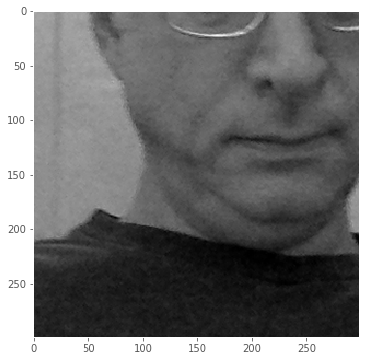

Enter 0:reshoot, any other:save0


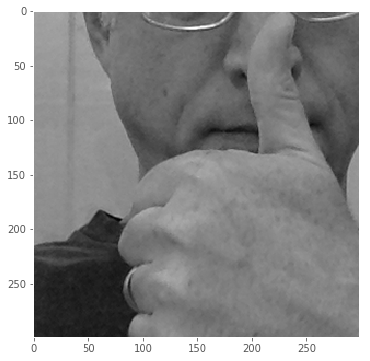

Enter 0:reshoot, any other:save


In [3]:
camera = pix.initialize_camera()

# Input a file name = brick shape: e.g. 3021
pic_label = raw_input('Type label (integer as file name):')

extension, filename = pix.increment_filename(pic_label,extension=1)

one_pic_X = pix.keep_shooting_until_acceptable(camera,filename)
del(camera)

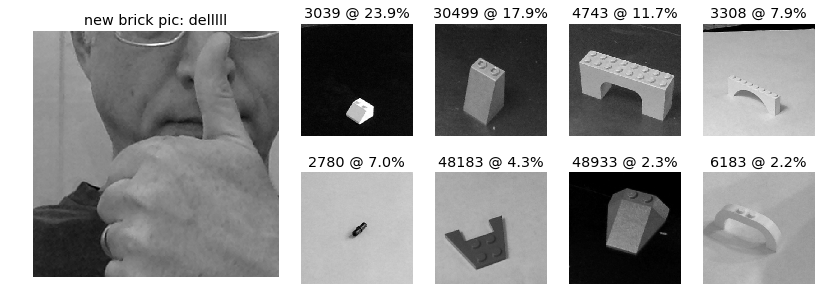

In [4]:
predict_gen = model.predict_on_batch(np.expand_dims(one_pic_X,axis=0))

preds, weights = pix.make_one_prediction_list(
    predict_gen,label_dic,n_match=10)

idx_preds = [picture_index_lookup[pred] for pred in preds]

ld.plot_top_8(one_pic_X,pic_label,X,idx_preds,preds,weights);